In [20]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

In [21]:
orders = pd.read_csv('orders_after_wrangling.csv', index_col=0, engine='python')
orders.head()

,Contact_Email_Address,Created,Account_SIC,Price_List,Price_List_Type,Total_Net_Price,Account_Market,Account_Name,Campaign_Name,Contact_First_Name,...,Order_Date,Order_Number,Registration_Channel,Registration_Type,Sales_Method,Sales_Source,Sales_Source_Cat,id,Group_Size,job_title
0,jfaddis@taleo.com,1/3/11 9:22,Management Consulting Services,19698.001 - Vendor,Vendor,15500.0,Secondary,Taleo,NaN,Josh,...,1/3/11,1-3341865771,Not Available,Sponsor,NaN,SMBARRETT,Sponsorship,34473,1,VP
1,christina.morgan1@us.army.mil,1/3/11 9:47,Army,10665.005 - Standard,Primary,1949.0,Primary,US Army Audit Agency,10665.005 HCMD 2011: Unknown without MACs,Christina,...,1/3/11,1-3341957177-A,Website,Delegate,NaN,Marketing,Marketing,12735,2,Manager
2,tfreeth@google.com,1/3/11 9:48,Web Search Portals,10701.005-Vendor,Vendor,3089.0,Secondary,Google,10701.005 ETail West 2011 Delegate Sales Campa...,Tim,...,1/3/11,1-3342074626,Outbound Phone,Delegate,Full Delegate Sale,TSPETERS,Delegate Sales,66732,1,C-Level
3,charley@gigya-inc.com,1/3/11 9:51,Software As A Service Solution Providers,10701.005-Vendor,Vendor,0.0,Secondary,Gigya,NaN,Charley,...,1/3/11,1-3342079261,Phone,Sponsorship Guest,NaN,Marketing,Marketing,11220,1,Director
4,autumn.coleman@servigistics.com,1/3/11 9:53,Software As A Service Solution Providers,10553.005 - Vendor,Vendor,0.0,Secondary,PTC,NaN,Autumn,...,1/3/11,1-3342070411-A,Not Available,Sponsorship Guest,NaN,Marketing,Marketing,5795,2,Manager


In [22]:
# Orders - Converting data types
orders['Created']  = pd.to_datetime(orders['Created'])
orders['Price_List_Type']  = orders['Price_List_Type'].astype('category')
orders['Total_Net_Price']  = orders['Total_Net_Price'].astype('float')
orders['Account_Market'] = orders['Account_Market'].astype('category')
orders['Currency'] = orders['Currency'].astype('category')
orders['Event_Plan_Start_Date']  = pd.to_datetime(orders['Event_Plan_Start_Date']).dt.normalize()
orders['Order_Date']  = pd.to_datetime(orders['Order_Date']).dt.normalize()
orders['Registration_Channel'] = orders['Registration_Channel'].fillna(value='Not Available').astype('category')
orders['Registration_Type']  = orders['Registration_Type'].astype('category')
orders['Registration_Type']  = orders['Registration_Type'].astype('category')
orders['Sales_Source_Cat']  = orders['Sales_Source_Cat'].astype('category')

orders.dtypes

Contact_Email_Address            object
Created                  datetime64[ns]
Account_SIC                      object
Price_List                       object
Price_List_Type                category
Total_Net_Price                 float64
Account_Market                 category
Account_Name                     object
Campaign_Name                    object
Contact_First_Name               object
Contact_Job_Function             object
Contact_Job_Title                object
Contact_Last_Name                object
Currency                       category
Event_Plan_Code                 float64
Event_Plan_Name                  object
Event_Plan_Start_Date    datetime64[ns]
MAC                              object
Order_Date               datetime64[ns]
Order_Number                     object
Registration_Channel           category
Registration_Type              category
Sales_Method                     object
Sales_Source                     object
Sales_Source_Cat               category


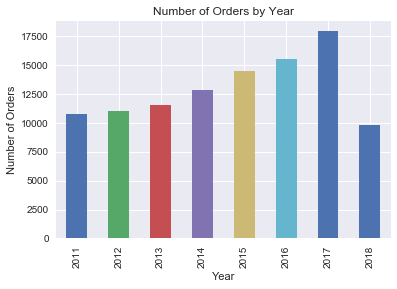

In [23]:
#Breakdown of orders by division

ax = orders.groupby(orders.Order_Date.dt.year).Sales_Source_Cat.count().plot(kind='bar', \
                                                                             title='Number of Orders by Year')
ax.set_xlabel("Year")
ax.set_ylabel("Number of Orders")
plt.show()

#NEED TO REMOVE DECIMALS ON YEARS

ValueError: DateFormatter found a value of x=0, which is an illegal date.  This usually occurs because you have not informed the axis that it is plotting dates, e.g., with ax.xaxis_date()

<Figure size 432x288 with 1 Axes>

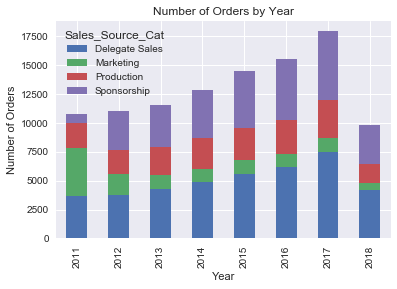

In [24]:
#Breakdown of orders by division

import matplotlib.dates as mdates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax = orders.groupby([orders.Order_Date.dt.year, 'Sales_Source_Cat']).Sales_Source_Cat.count().unstack('Sales_Source_Cat')\
.plot(kind='bar', stacked=True, title='Number of Orders by Year')
ax.xaxis_date()
ax.set_xlabel("Year")
ax.set_ylabel("Number of Orders")
plt.show()

#NEED TO REMOVE DECIMALS ON YEARS
#WAS UNABLE TO FIGURE OUT ERROR - ANY WAY TO REMOVE?

# interesting to see the growth in Delegate Sales registrations

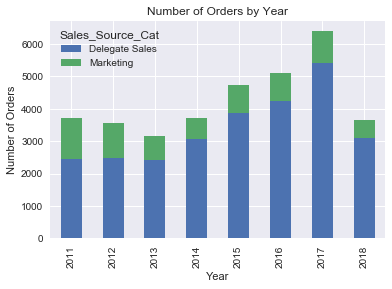

In [25]:
orders_delegate = orders[orders.Registration_Type == 'Delegate']
ax = orders_delegate.groupby([orders_delegate.Order_Date.dt.year, 'Sales_Source_Cat']).Sales_Source_Cat.count().unstack('Sales_Source_Cat')\
.plot(kind='bar', stacked=True, title='Number of Orders by Year')
ax.xaxis_date()
ax.set_xlabel("Year")
ax.set_ylabel("Number of Orders")
plt.show()

In [26]:
# Identifying top 10 days in terms of number of delegate registrations
top10days = orders_delegate['Total_Net_Price'].groupby(orders_delegate.Order_Date).agg(['mean', 'count'])
top10days.sort_values('count', ascending=False).head(10)

#Top 10 days all within the last two years
#All fall on the last 2 days of the month!

,mean,count
Order_Date,,
2018-01-31,1341.435957,141
2018-04-30,1254.289841,126
2017-01-31,1390.507265,117
2018-02-28,1103.890000,103
2017-02-28,1404.298600,100
2017-03-31,1354.684105,95
2017-09-29,1212.224839,93
2016-08-31,1114.764767,86
2015-01-30,1805.966395,86


In [27]:
# Identifying top 10 days in terms of sponsor registrations
orders_sponsors = orders[orders.Registration_Type == 'Sponsor']
top10days = orders_sponsors['Total_Net_Price'].groupby(orders_sponsors.Order_Date).agg(['mean', 'count'])
top10days.sort_values('count', ascending=False).head(10)

,mean,count
Order_Date,,
2018-01-05,17613.636364,22
2016-12-20,20816.666667,21
2017-11-03,22033.910000,20
2017-11-07,23030.000000,20
2016-10-25,17355.000000,20
2018-01-16,18600.000000,20
2018-04-13,23907.894737,19
2018-02-26,30183.421053,19
2016-11-14,20400.000000,18


In [28]:
#Calculating difference betwen order date and event date
orders['Days_Ahead_of_Event'] = orders['Event_Plan_Start_Date']-orders['Order_Date']
orders['Days_Ahead_of_Event'].head()

0   120 days
1    41 days
2    49 days
3    49 days
4    21 days
Name: Days_Ahead_of_Event, dtype: timedelta64[ns]

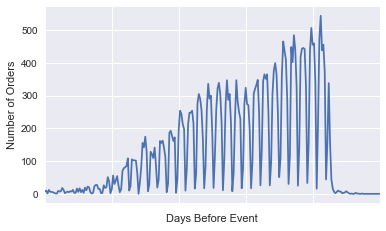

In [29]:
#Plotting number of registrations in terms of time before event start

orders_delegate = orders[orders.Registration_Type == 'Delegate']
ax = orders_delegate.groupby([orders_delegate.Days_Ahead_of_Event]).Order_Number.count().plot()
plt.xlim(250,0)
plt.xticks([250, 200, 150, 100, 50, 0])  #Doesn't work - how to set x axis labels?
ax.set_xlabel("Days Before Event")
plt.xticks(rotation=30)
ax.set_ylabel("Number of Orders")
plt.show()

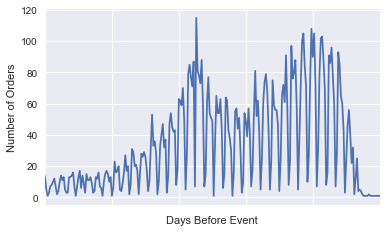

In [30]:
#Number of sponsorship deals in terms of time before event start

orders_sponsors = orders[orders.Registration_Type == 'Sponsor']
ax = orders_sponsors.groupby([orders_sponsors.Days_Ahead_of_Event]).Order_Number.count().plot()
plt.xlim(250,0)
plt.xticks([250, 200, 150, 100, 50, 0])  #Doesn't work - how to set x axis labels?
ax.set_xlabel("Days Before Event")
plt.xticks(rotation=30)
ax.set_ylabel("Number of Orders")
plt.show()

In [31]:
# Do certain types of companies (SIC) that pay more or less to attend conferences?
orders_delegate = orders[orders.Registration_Type == 'Delegate']
top10SIC = orders_delegate['Total_Net_Price'].groupby(orders_delegate.Account_SIC).agg(['mean', 'count'])
#top10SIC = top10SIC['count]>=10   # How do I keep only those gorupd with counts of 10+?
top10SIC.sort_values('count', ascending=False).head(10)

,mean,count
Account_SIC,,
Software As A Service Solution Providers,2295.444637,1818
Pharmaceutical,1878.980647,1066
Investment Banking and Securities Dealing,1417.661348,1016
Clothing Stores,918.529980,1004
Advertising/Marketing,2686.474425,669
"Medical, Dental, and Hospital Equipment and 423450",1538.176647,665
Department Stores,990.983769,650
IT Solutions & Services Providers,2207.772083,533
Management Consulting Services,2445.087417,515


In [32]:
#What is the most popular day of the week to purchase an event ticket?
#No Real outliers - Didnt expect Tuesday but not significantely more.

orders_delegate['day_of_week'] = orders_delegate['Order_Date'].dt.weekday_name
orders_delegate['Order_Number'].groupby(orders_delegate['day_of_week']).count()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


day_of_week
Friday       6895
Monday       6214
Saturday       99
Sunday         91
Thursday     6888
Tuesday      7144
Wednesday    6755
Name: Order_Number, dtype: int64

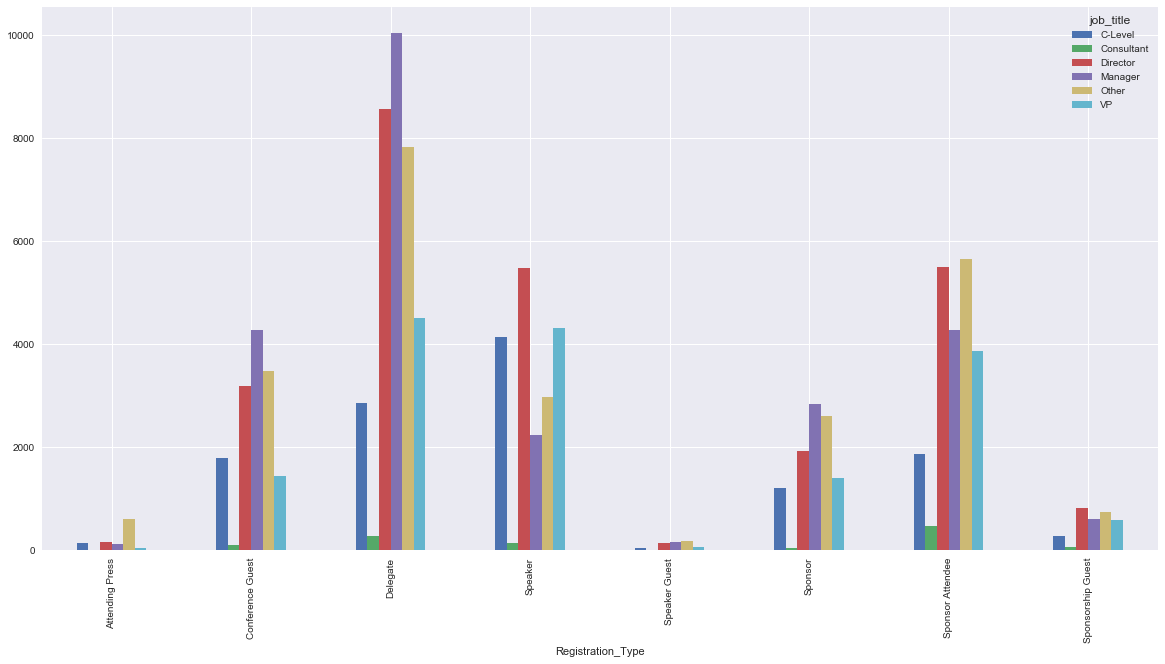

In [33]:
orders['job_title'].groupby(orders['Registration_Type']).value_counts().unstack().plot(kind='bar', figsize=(20,10))

#orders['job_title'].groupby(orders['Registration_Type']).count.plot()
#plt.show()

In [34]:
orders['job_title'].groupby(orders['Registration_Type']).value_counts(normalize=True)

# Delegates - 25% Director, 13% VP, 8% C-Level
# Speakers - 28% Director, 22% VP, 21% C-Level
# Conference Guset - 22% Director, 10% VP, 12% C-Level (This seems low for Guests)

Registration_Type  job_title 
Attending Press    Other         0.568352
                   Director      0.155431
                   C-Level       0.131086
                   Manager       0.107678
                   VP            0.034644
                   Consultant    0.002809
Conference Guest   Manager       0.299419
                   Other         0.244070
                   Director      0.222798
                   C-Level       0.125674
                   VP            0.100903
                   Consultant    0.007137
Delegate           Manager       0.294960
                   Director      0.251482
                   Other         0.229596
                   VP            0.132048
                   C-Level       0.084023
                   Consultant    0.007892
Speaker            Director      0.284047
                   VP            0.223939
                   C-Level       0.215227
                   Other         0.154082
                   Manager       0.115704
    

In [35]:
bydept = orders.groupby(['Sales_Source_Cat','job_title'], as_index=False)['Registration_Type'].count().reset_index()
print(bydept)

    index Sales_Source_Cat   job_title  Registration_Type
0       0   Delegate Sales     C-Level               3871
1       1   Delegate Sales  Consultant                270
2       2   Delegate Sales    Director               9582
3       3   Delegate Sales     Manager              12307
4       4   Delegate Sales       Other               9213
5       5   Delegate Sales          VP               4741
6       6        Marketing     C-Level               1214
7       7        Marketing  Consultant                166
8       8        Marketing    Director               3184
9       9        Marketing     Manager               2769
10     10        Marketing       Other               3474
11     11        Marketing          VP               1837
12     12       Production     C-Level               4192
13     13       Production  Consultant                139
14     14       Production    Director               5614
15     15       Production     Manager               2383
16     16     

In [36]:
events = pd.read_csv('Events_Since_2012_Clean.csv', index_col=None, engine='python')
events.head()

,Topic_Area,Type,Code,Promotion_Plan,Event_Plan_Date,Total_Dels,Total_Rev,Booking_Pattern_Comparison,Total_Guests,Avg_Cost_of_Acquisition,...,Total_EQ_Rev,EQ_Price_Point,EQ_perc_of_ttl_Rev,Spex_Rev,Spex_Last_Year,Num_Spex_EQs,Num_Spex_Props,Props_Last_Year,Num_TMs,Num_SPKRs
0,Retail,Stage 1,20553.001,Social Commerce Strategies,1/24/12,67,80759,NaN,30.0,176.0,...,24950,1386.0,31%,199000,NaN,115,42.0,NaN,226.0,45
1,Logistics,Stage 1,20743.001,Field Service Medical 2012,1/23/12,89,154039,NaN,31.0,127.0,...,43651,1898.0,28%,166000,NaN,70,29.0,NaN,141.0,26
2,Retail,Stage 2/LSE,10701.006,eTail 2012 West,2/27/12,536,853865,499.0,872.0,122.0,...,180827,1435.0,21%,3765700,3091000.0,250,187.0,164.0,456.0,204
3,Procurement,Stage 2/LSE,12727.005,ProcureCon Indirect East 2012,2/13/12,89,129305,65.0,100.0,129.0,...,37587,1392.0,29%,440250,407500.0,74,39.0,44.0,281.0,78
4,Logistics,Stage 1,19328.002,Defense Maintenance 2012,2/27/12,115,150381,156.0,24.0,142.0,...,43221,1351.0,29%,174500,107800.0,104,34.0,14.0,18.0,43


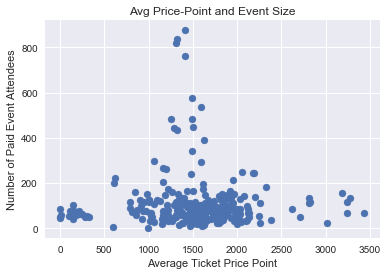

In [37]:
# Is there a correlation between price point and total number of paid attendees?
sns.set()
x = events.Total_Rev/events.Total_Dels
y = events.Total_Dels
plt.scatter(x,y)
plt.title("Avg Price-Point and Event Size")
plt.xlabel("Average Ticket Price Point")
plt.ylabel("Number of Paid Event Attendees")
plt.show()

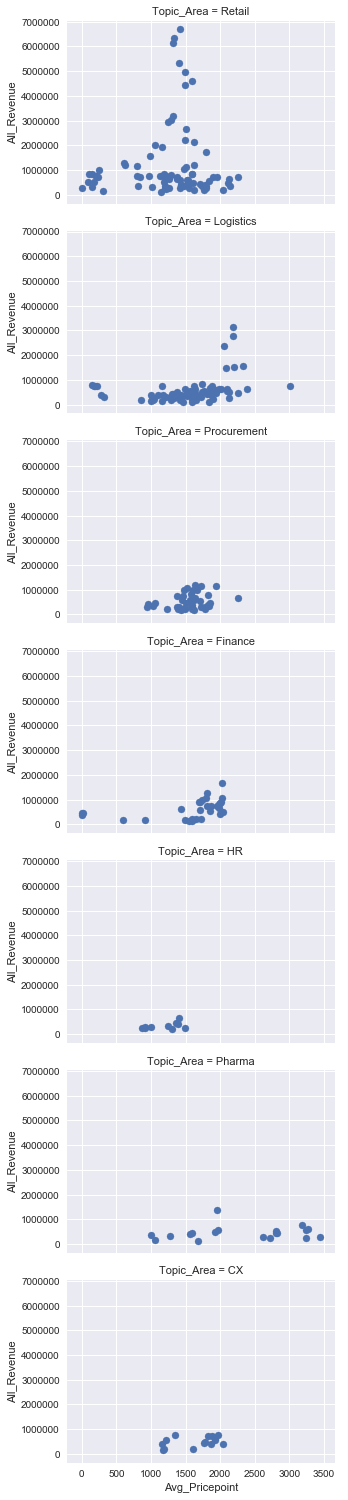

In [40]:
# Price point to event revenue correlation BY EVENT TOPIC AREA
sns.set()

events['Avg_Pricepoint'] = events.Total_Rev/events.Total_Dels
events['All_Revenue'] = events.Total_Rev+events.Spex_Rev

df = events[['Avg_Pricepoint', 'All_Revenue', 'Topic_Area']]
fg = sns.FacetGrid(data=df, row='Topic_Area', aspect=1.6)
fg.map(plt.scatter, 'Avg_Pricepoint', 'All_Revenue').add_legend()

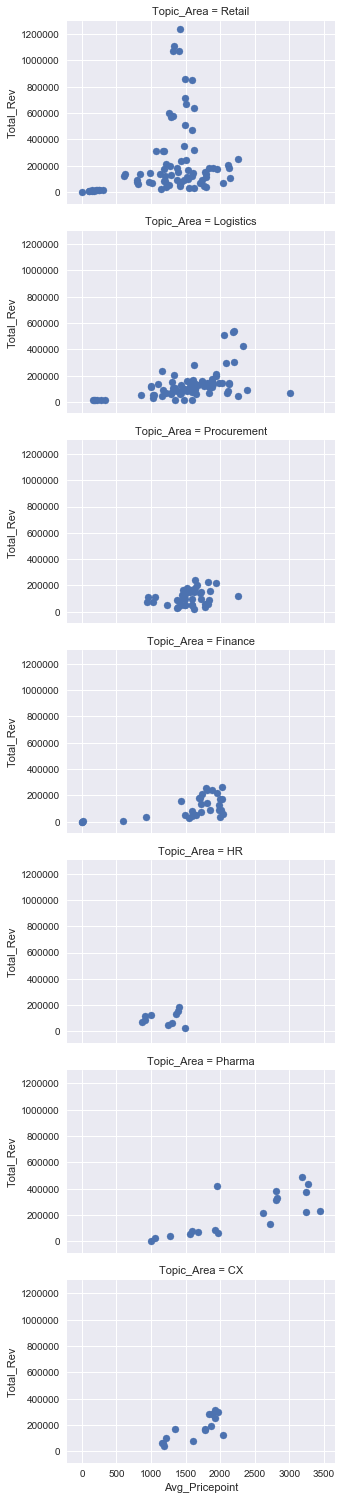

In [42]:
# Price point to total attendee revenue correlation BY EVENT TOPIC AREA
df = events[['Avg_Pricepoint', 'Total_Rev', 'Topic_Area']]
fg = sns.FacetGrid(data=df, row='Topic_Area', aspect=1.6)
fg.map(plt.scatter, 'Avg_Pricepoint', 'Total_Rev').add_legend()

In [43]:
# Computing mean of total event revenue and percentiles
print ('The average total revenue for the events is', np.mean(events['All_Revenue']))
percentiles = np.array([2.5, 25, 50, 75, 97.5])
print ('with a 2.5, 25, 50, 75 and 97.5 prcetile breakdown of:', np.percentile(events['All_Revenue'],percentiles))

The average total revenue for the events is 746041.2398523985
with a 2.5, 25, 50, 75 and 97.5 prcetile breakdown of: [ 140232.25  303926.    493187.    763410.   3494727.  ]


In [44]:
# Computing mean of total attendee revenue and percentiles
print ('The average attendee revenue for the events is', np.mean(events['Total_Rev']))
print ('with a 2.5, 25, 50, 75 and 97.5 prcetile breakdown of:', np.percentile(events['Total_Rev'],percentiles))

The average attendee revenue for the events is 161915.2656826568
with a 2.5, 25, 50, 75 and 97.5 prcetile breakdown of: [  5791.75  58720.5  116037.   178824.   683045.  ]


In [45]:
# Computing mean of an average event pricepoint and percentiles
print ('The average attendee revenue for the events is', np.mean(events['Avg_Pricepoint']))
print ('with a 2.5, 25, 50, 75 and 97.5 prcetile breakdown of:', np.percentile(events['Avg_Pricepoint'],percentiles))

The average attendee revenue for the events is 1507.5249784788373
with a 2.5, 25, 50, 75 and 97.5 prcetile breakdown of: [ 143.61554622 1234.58598531 1554.11111111 1826.09962049 2814.14188034]


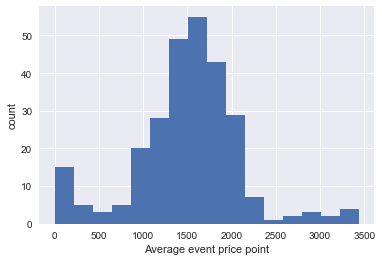

In [46]:
#histogram of average event price point - this pattern can be seen in the scatter plot as well
sns.set()

# Number of bins is the square root of number of data points: n_bins
n_data = len(events)
n_bins = np.sqrt(n_data)
n_bins = int(n_bins)

plt.hist(events['Avg_Pricepoint'], bins=n_bins)
_ = plt.xlabel('Average event price point')
_ = plt.ylabel('count')
plt.show()

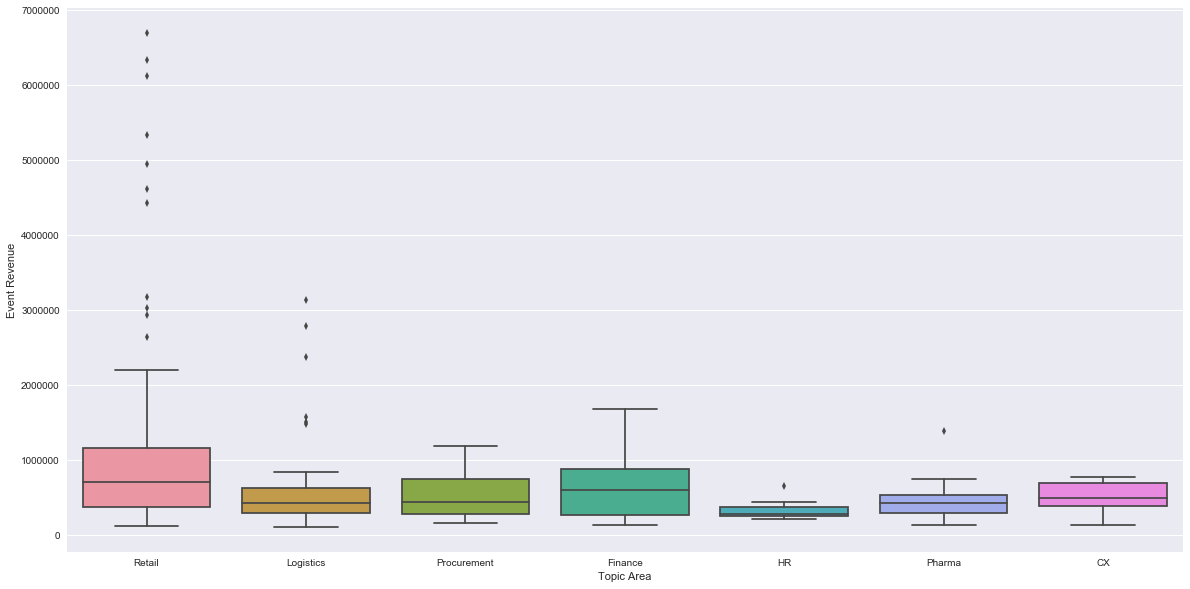

In [47]:
#box plot event revenue by topic area
plt.subplots(figsize=(20,10))
_ = sns.boxplot(x='Topic_Area', y='All_Revenue', data=events)
_ = plt.xlabel('Topic Area')
_ = plt.ylabel('Event Revenue')
plt.show()

# Many outliers , particularly in the Retail event subject area

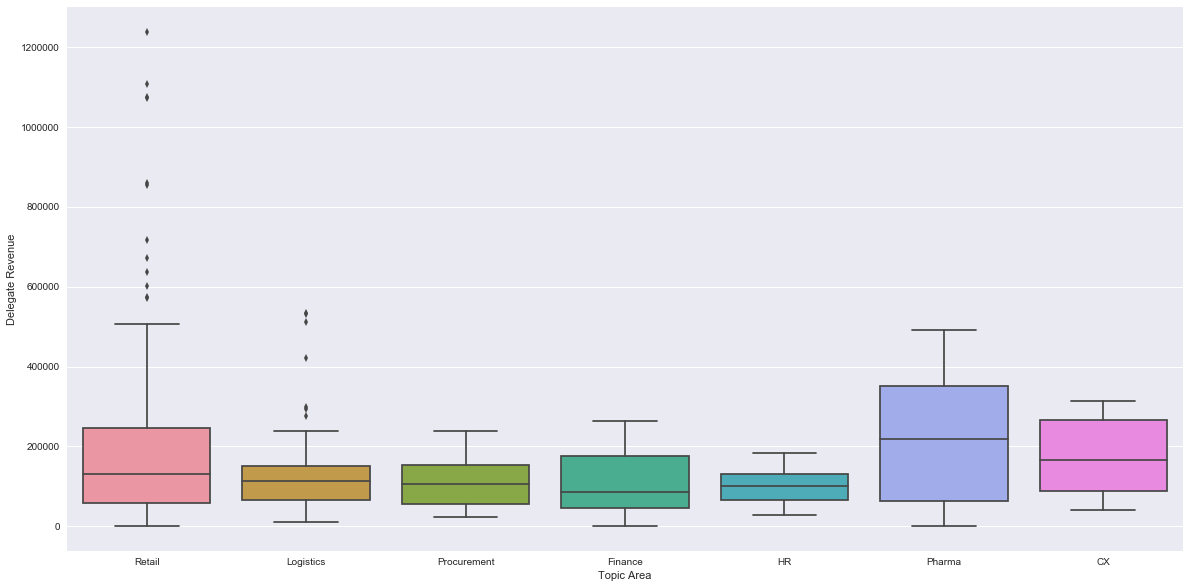

In [48]:
#box plot of attendee  revenue by topic area
plt.subplots(figsize=(20,10))
_ = sns.boxplot(x='Topic_Area', y='Total_Rev', data=events)
_ = plt.xlabel('Topic Area')
_ = plt.ylabel('Delegate Revenue')
plt.show()

# Investigate pharma further? Interesting to see the variance as being greater - much of the revenue 
#likely comes attendee passes.

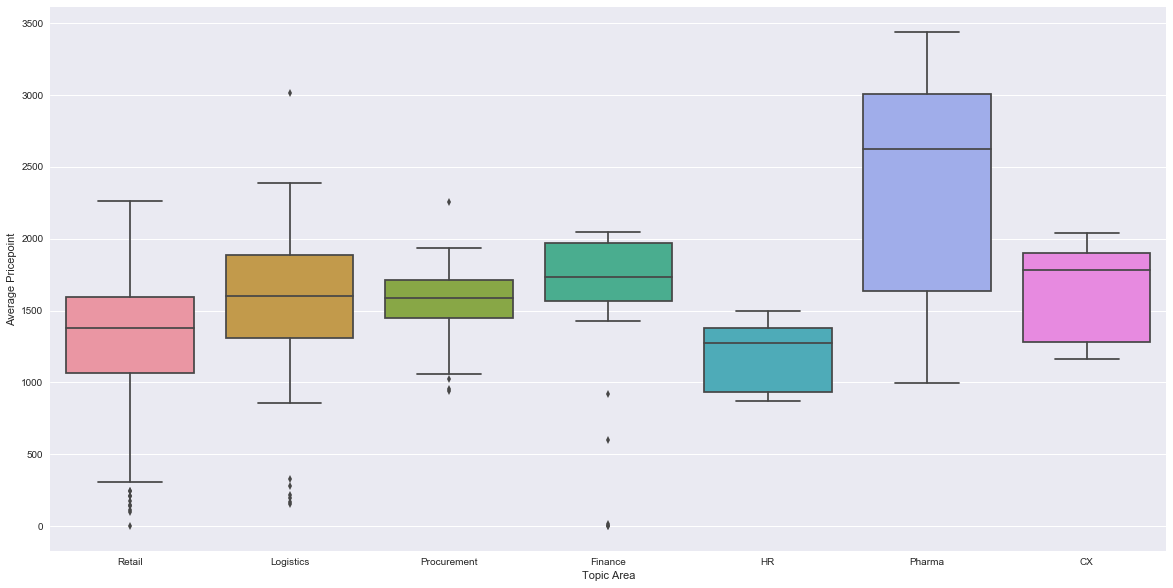

In [49]:
#box plot of attendee  revenue by topic area
plt.subplots(figsize=(20,10))
_ = sns.boxplot(x='Topic_Area', y='Avg_Pricepoint', data=events)
_ = plt.xlabel('Topic Area')
_ = plt.ylabel('Average Pricepoint')
plt.show()

In [ ]:
## More ideas:

# Growth by year by event topic area: number of attendees, revenue, number of events per year
# ECDF
# bootstrapping - discuss with David. Does it make senese in the case of this data set?

In [ ]:
#computing and plotting the ECDF
#def ecdf(data):
#    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
#    n = len(data)

    # x-data for the ECDF: x
#    x = np.sort(data)

    # y-data for the ECDF: y
#    y = np.arange(1, n+1) / n

#    return x, y